In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from tqdm import tqdm



In [45]:
x, y = make_blobs(n_samples=2000, n_features=2, centers=4, random_state=1)

In [20]:
def init_centroids(x, k):
    n_features = x.shape[1]
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroids[i] = x[random.randint(0, x.shape[0] - 1)]
    return centroids


def euclidean_distance(a, b):
    return np.linalg.norm(a - b)



In [21]:


def assign_clusters(x, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in x:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)
    return clusters



In [22]:

def update_centroids(clusters):
    new_centroids = np.zeros((len(clusters), clusters[0][0].shape[0]))
    for i, cluster in enumerate(clusters):
        new_centroids[i] = np.mean(cluster, axis=0)
    return new_centroids



In [23]:
def k_means(x, k, n_iter=100):
    centroids = init_centroids(x, k)
    for _ in tqdm(range(n_iter)):
        clusters = assign_clusters(x, centroids)
        new_centroids = update_centroids(clusters)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


  5%|████                                                                              | 5/100 [00:01<00:24,  3.88it/s]


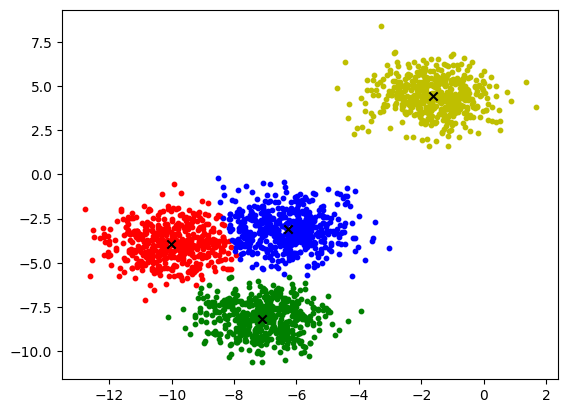

In [47]:


k = 4
centroids, clusters = k_means(x, k)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x')
plt.show()